### CS559 - Homework #5

**Author**: Sid Bhatia

**Date**: November 15, 2024

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Dr. In Suk Jang

#### 1. Unsupervised Learning [65 pts]

Supervised learning techniques cannot be applied when a given data set does not have feature names or
unknown targets. Instead, we can apply unsupervised learning techniques such as clustering analysis or
dimensionality reduction to learn about the hidden structures of the data set. Sometimes, such methods
can be applied in EDA or preprocessing the training data to build a supervised learning model. In this
question, we will practice implementing, fitting, and analyzing unsupervised learning algorithms.

### 1.1 Clustering Analysis [40 pts]

a. Load the provided data - autompg.csv. The data contains seven columns; the target is mpg.
This data set can be used for both classification and regression problems.

In [3]:
import pandas as pd

# Load the dataset
file_path = 'autompg.csv'
auto_mpg_df = pd.read_csv(file_path)

print("Dataset Preview:")
print(auto_mpg_df.head())

print("\nDataset Information:")
auto_mpg_df.info()

Dataset Preview:
    mpg  cylinders  displacement  horsepower  weight  acceleration  model-year
0  18.0          8         307.0       130.0    3504          12.0          70
1  15.0          8         350.0       165.0    3693          11.5          70
2  18.0          8         318.0       150.0    3436          11.0          70
3  16.0          8         304.0       150.0    3433          12.0          70
4  17.0          8         302.0       140.0    3449          10.5          70

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int6

In [ ]:
print("\nSummary Statistics:")
print(auto_mpg_df.describe())

print("\nMissing Values:")
print(auto_mpg_df.isnull().sum())


Summary Statistics:
              mpg   cylinders  displacement  horsepower       weight   
count  398.000000  398.000000    398.000000  396.000000   398.000000  \
mean    23.514573    5.454774    193.425879  104.189394  2970.424623   
std      7.815984    1.701004    104.269838   38.402030   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   92.000000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model-year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  

Missing Values:
mpg    

In [5]:
print("\nColumn Names:")
print(auto_mpg_df.columns)


Column Names:
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model-year'],
      dtype='object')


b. [5 pts] Relabel mpg into three ordinal domains [good (2), average (1), bad (0)] by calculating
the quantiles using numpy.quantitle. For other continuous columns, convert to four ordinal
categorical features as (4) - high, (3) - good, (2) - okay, (1) - poor.

In [6]:
import numpy as np

mpg_quantiles = np.quantile(auto_mpg_df['mpg'], [0.33, 0.67])

def relabel_mpg(value):
    if value <= mpg_quantiles[0]:
        return 0  # bad
    elif value <= mpg_quantiles[1]:
        return 1  # average
    else:
        return 2  # good

auto_mpg_df['mpg_category'] = auto_mpg_df['mpg'].apply(relabel_mpg)

continuous_columns = auto_mpg_df.select_dtypes(include=['float64', 'int64']).columns.drop('mpg')

def relabel_continuous(value, quantiles):
    if value <= quantiles[0]:
        return 1  # poor
    elif value <= quantiles[1]:
        return 2  # okay
    elif value <= quantiles[2]:
        return 3  # good
    else:
        return 4  # high

for column in continuous_columns:
    quantiles = np.quantile(auto_mpg_df[column], [0.25, 0.5, 0.75])
    auto_mpg_df[f'{column}_category'] = auto_mpg_df[column].apply(lambda x: relabel_continuous(x, quantiles))

In [9]:
print("\nUpdated Dataset with Ordinal Categories:")
print(auto_mpg_df.head())


Updated Dataset with Ordinal Categories:
    mpg  cylinders  displacement  horsepower  weight  acceleration   
0  18.0          8         307.0       130.0    3504          12.0  \
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model-year  mpg_category  cylinders_category  displacement_category   
0          70             0                   3                      4  \
1          70             0                   3                      4   
2          70             0                   3                      4   
3          70             0                   3                      4   
4          70             0                   3                      4   

   horsepower_category  weight_category  acceleration_category   
0                    4    

In [12]:
auto_mpg_df = auto_mpg_df.drop(columns=['mpg_category_category'])

print("\nCleaned Dataset:")
print(auto_mpg_df.head())


Cleaned Dataset:
    mpg  cylinders  displacement  horsepower  weight  acceleration   
0  18.0          8         307.0       130.0    3504          12.0  \
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model-year  mpg_category  cylinders_category  displacement_category   
0          70             0                   3                      4  \
1          70             0                   3                      4   
2          70             0                   3                      4   
3          70             0                   3                      4   
4          70             0                   3                      4   

   horsepower_category  weight_category  acceleration_category   
0                    4                3           

In [13]:
print("MPG Quantiles (33%, 67%):", mpg_quantiles)

print(auto_mpg_df[['mpg', 'mpg_category']].head(10))

MPG Quantiles (33%, 67%): [19. 27.]
    mpg  mpg_category
0  18.0             0
1  15.0             0
2  18.0             0
3  16.0             0
4  17.0             0
5  15.0             0
6  14.0             0
7  14.0             0
8  14.0             0
9  15.0             0


In [ ]:
print("\nRows with mpg_category == 1 (average):")
print(auto_mpg_df[auto_mpg_df['mpg_category'] == 1].head())


Rows with mpg_category == 1 (average):
     mpg  cylinders  displacement  horsepower  weight  acceleration   
14  24.0          4         113.0        95.0    2372          15.0  \
15  22.0          6         198.0        95.0    2833          15.5   
17  21.0          6         200.0        85.0    2587          16.0   
18  27.0          4          97.0        88.0    2130          14.5   
19  26.0          4          97.0        46.0    1835          20.5   

    model-year  mpg_category  cylinders_category  displacement_category   
14          70             1                   1                      2  \
15          70             1                   3                      3   
17          70             1                   3                      3   
18          70             1                   1                      1   
19          70             1                   1                      1   

    horsepower_category  weight_category  acceleration_category   
14             

In [15]:
print("\nRows with mpg_category == 2 (good):")
print(auto_mpg_df[auto_mpg_df['mpg_category'] == 2].head())


Rows with mpg_category == 2 (good):
     mpg  cylinders  displacement  horsepower  weight  acceleration   
30  28.0          4         140.0        90.0    2264          15.5  \
50  28.0          4         116.0        90.0    2123          14.0   
51  30.0          4          79.0        70.0    2074          19.5   
52  30.0          4          88.0        76.0    2065          14.5   
53  31.0          4          71.0        65.0    1773          19.0   

    model-year  mpg_category  cylinders_category  displacement_category   
30          71             2                   1                      2  \
50          71             2                   1                      2   
51          71             2                   1                      1   
52          71             2                   1                      1   
53          71             2                   1                      1   

    horsepower_category  weight_category  acceleration_category   
30                

c. [10 pts] Implement a myKmean(X, k, iter) algorithm as a function (not a class) using only NumPy.
The parameter X is the data, k is the number of clusters, and iter is the number of iterations. The
function returns the final cluster labels, the centroid of clusters, and the total variance of the
algorithm.

In [16]:
def myKmean(X, k, iter):
    np.random.seed(42)

    initial_indices = np.random.choice(X.shape[0], size=k, replace=False)
    centroids = X[initial_indices]
    
    for _ in range(iter):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([X[labels == i].mean(axis=0) if len(X[labels == i]) > 0 else centroids[i]
                                   for i in range(k)])
        
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    
    total_variance = sum(np.sum((X[labels == i] - centroids[i]) ** 2) for i in range(k))
    
    return labels, centroids, total_variance

d. [10 pts] Determine the appropriate k value of the new data set using myKmean. Show that the
total variance converges as k increases.

k=1, Total Variance=2679.65
k=2, Total Variance=1299.39
k=3, Total Variance=1041.71
k=4, Total Variance=790.36
k=5, Total Variance=721.94
k=6, Total Variance=642.62
k=7, Total Variance=611.70
k=8, Total Variance=539.92
k=9, Total Variance=492.19
k=10, Total Variance=480.36


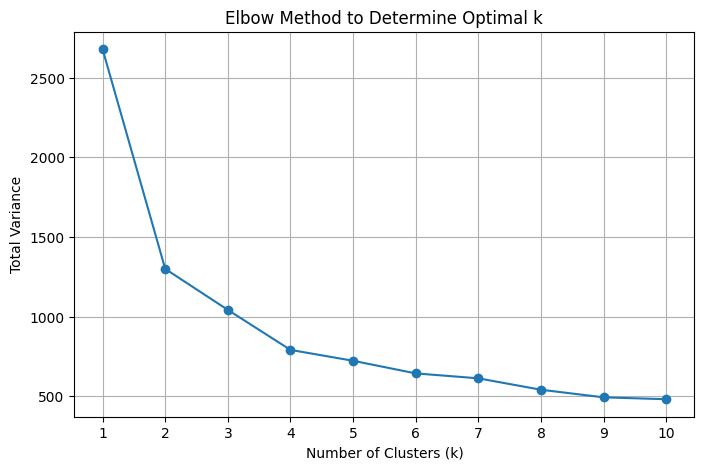

In [ ]:
ordinal_columns = [col for col in auto_mpg_df.columns if '_category' in col]
X = auto_mpg_df[ordinal_columns].to_numpy()

k_values, variances = [], []

for k in range(1, 11):
    _, _, total_variance = myKmean(X, k, iter=10)
    k_values.append(k)
    variances.append(total_variance)
    print(f"k={k}, Total Variance={total_variance:.2f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(k_values, variances, marker='o')
plt.title("Elbow Method to Determine Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Total Variance")
plt.xticks(k_values)
plt.grid()
plt.show()